In [1]:
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.datasets import SupervisedDataSet
from pybrain.structure import FullConnection, FeedForwardNetwork, TanhLayer, LinearLayer, BiasUnit, SigmoidLayer, GaussianLayer, SoftmaxLayer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import r2_score
%matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("RealEstate.csv", index_col=[0])
df.head()

,value,livingSpace
id,,
0,1750000,500
1,357660,153
2,699000,245
3,332950,148
4,352950,173


## Look at the Data

(0, 900.0)

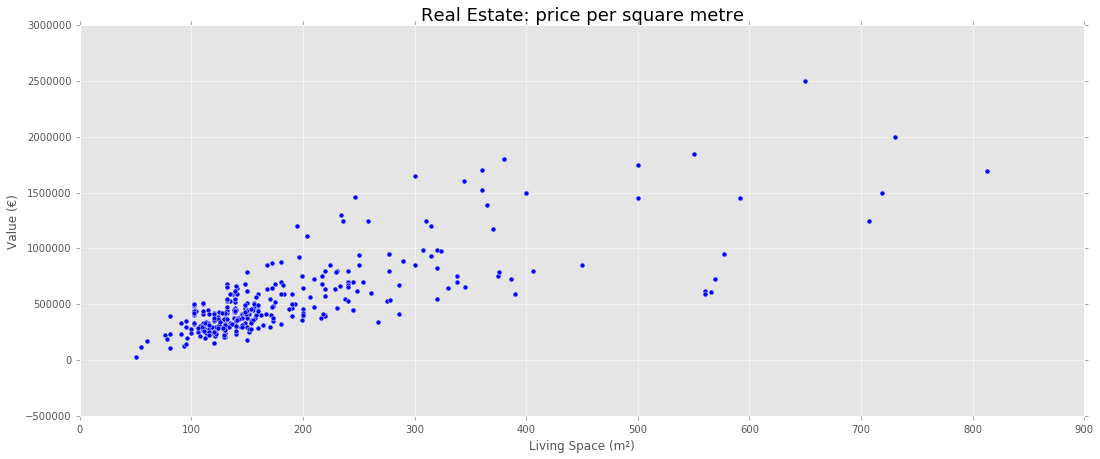

In [3]:
plt.figure(figsize=(18,7))

plt.scatter( df.livingSpace, df.value, s = 25,)

plt.ylabel(u"Value (€)")
plt.xlabel(u"Living Space (m²)")
plt.title("Real Estate: price per square metre", fontsize = 18)
plt.xlim(0,)

# Create a Neural Network

In [4]:
#Initialize the NN
fnn = FeedForwardNetwork()

#Input Layer with 1 Neuron because there is one X var
inLayer = LinearLayer(1, name ="Linear Inpute")
#One Hidden Layer: with Sigmoid Activation function and 4 Neurons
hiddenLayer = SigmoidLayer(4, name ="Sig Hidden")
#Output Layer: Linear because it's a regression.
#One Neuron, because there is one output value
outLayer = LinearLayer(1, name="Linear Out")


#Declare them as Modules of the NeuralNetwork
fnn.addInputModule(inLayer)
fnn.addModule(hiddenLayer)
fnn.addOutputModule(outLayer)

#Connect each layer
from pybrain.structure import FullConnection
in_to_hidden = FullConnection(inLayer, hiddenLayer)
hidden_to_out = FullConnection(hiddenLayer, outLayer)

fnn.addConnection(in_to_hidden)
fnn.addConnection(hidden_to_out)

#Finalize the Neural Network
fnn.sortModules()

#### Turn the Data into a SupervisedDataSet

In [5]:
y = df.value
x = df.livingSpace

#Normalize the Data with L2 Normalization
#PyBrain NN do not properly work with large values

wy = np.sqrt(sum(y**2))
wx = np.sqrt(sum(x**2))
y_norm = y/wy
x_norm = x/wx

In [6]:
#1,1 because one input and one output value
DS = SupervisedDataSet( 1, 1 )

#Append Linked: x,y
for i in range(len(df)):
    DS.appendLinked((x_norm.ix[i]),(y_norm.ix[i]))

#### Build and use the Trainer

In [7]:
#Learning Rate shouldnt be bigger than 0.01
t = BackpropTrainer(fnn, learningrate = 0.01, momentum = 0.99, verbose = False,lrdecay=0.9999)

#Training on the DataSet with 1000 epochs
t.trainOnDataset(DS, 1000)

Total error:  0.0678850640529
Total error:  0.00271066051398
Total error:  0.000671630249633
Total error:  0.000521368301943
Total error:  0.000514576959661
Total error:  0.000543164680912
Total error:  0.000542672670577
Total error:  0.000429369623583
Total error:  0.000415222767724
Total error:  0.000392453274269
Total error:  0.000381896354465
Total error:  0.00042513052193
Total error:  0.0003829837251
Total error:  0.000361708666004
Total error:  0.000334770863047
Total error:  0.000306684759163
Total error:  0.000330175800061
Total error:  0.000328066836932
Total error:  0.000278109848932
Total error:  0.000277666854879
Total error:  0.000274648794748
Total error:  0.000292442410295
Total error:  0.000284421183673
Total error:  0.000337164953661
Total error:  0.000284685210491
Total error:  0.000243260945815
Total error:  0.000235554280295
Total error:  0.000235121101191
Total error:  0.000245584888068
Total error:  0.000241626377239
Total error:  0.000247340278683
Total error:  

# Model Evaluation

In [8]:
y_pred = fnn.activateOnDataset(DS)
#"DeNormalize" Again to turn the data into the original monetary value
y_pred = y_pred * wy

In [9]:
#Create the DataSet for a RegressionLine

x_pred = np.arange(5,870, 10)



DS_Eval = SupervisedDataSet( 1, 0 )
#Append Linked: x,y
for i in range(len(x_pred)):
    #Divide the X value by the L2 X-Weight
    DS_Eval.appendLinked((x_pred[i]/wx),())
nn_regressionLine = fnn.activateOnDataset(DS_Eval)
#Always multiply with the L2 normalization weight
nn_regressionLine = nn_regressionLine*wy

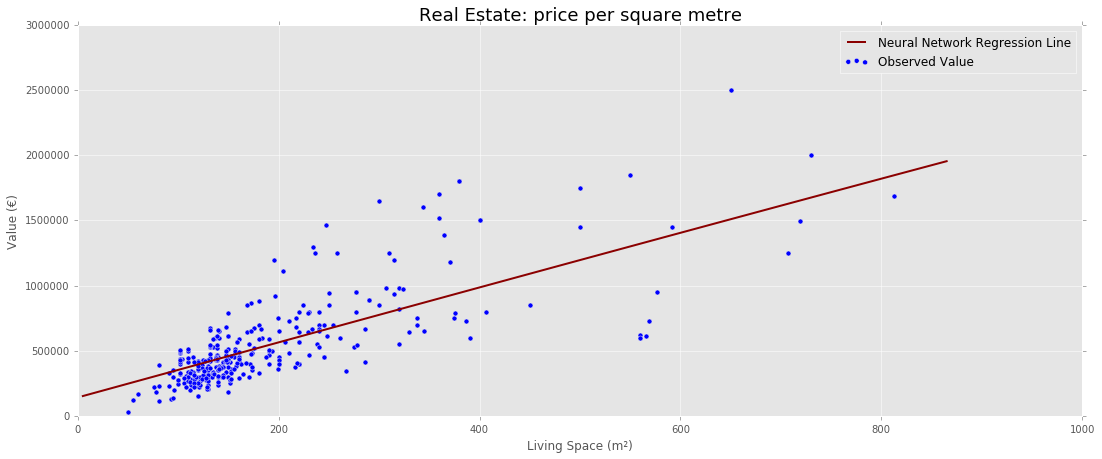

In [10]:
plt.figure(figsize=(18,7))

plt.scatter( df.livingSpace, df.value, s = 25,)

plt.plot(x_pred, nn_regressionLine, color = "darkred", lw = 2)

plt.ylabel(u"Value (€)")
plt.xlabel(u"Living Space (m²)")
plt.title("Real Estate: price per square metre", fontsize = 18)
plt.xlim(0,)
plt.ylim(0,)

plt.legend([ "Neural Network Regression Line","Observed Value"])

## R2 Evaluation Score

In [11]:
r2_score = sklearn.metrics.r2_score(y, y_pred)
r2_score

0.58780523778600946

### Comparison with OLS Linear Regression

In [12]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [13]:
linearRegression = OLS(y,sm.add_constant(x)).fit()
linReg_r2_score = linearRegression.rsquared

In [14]:
print "Neural Network R2:", round(r2_score,4)
print "Linear Regression R2:", round(linReg_r2_score,4)

Neural Network R2: 0.5878
Linear Regression R2: 0.5937
